In [68]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal
import math

Text(0, 0.5, 'Amplitude')

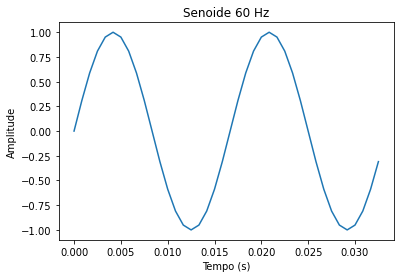

In [69]:
# Preparação (Copiado do Roteiro)
fs=1200
length=1
t=np.arange(0,length,1/fs)
fm=60
senoide=np.sin(2*np.pi*t*fm)
plt.plot(t[0:2*int(fs/fm)],senoide[0:2*int(fs/fm)])
plt.title('Senoide 60 Hz')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Magnitude')

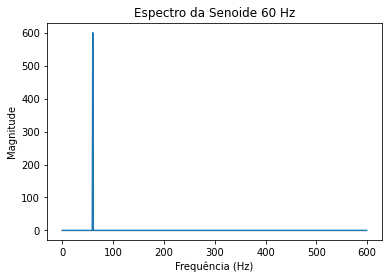

In [70]:
N=len(t)
fft_senoide=np.fft.fft(senoide)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_senoide)[0:int(N/2)])
plt.title('Espectro da Senoide 60 Hz')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Amplitude')

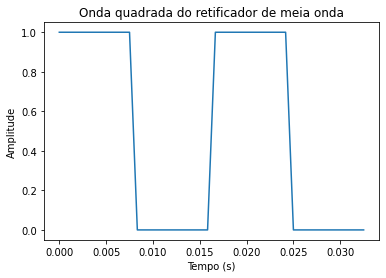

In [71]:
square_block=np.append(np.ones(int(fs/(2*fm))),np.zeros(int(fs/(2*fm))))
square=np.tile(square_block,int(length*fm))
plt.plot(t[0:2*int(fs/fm)],square[0:2*int(fs/fm)])
plt.title('Onda quadrada do retificador de meia onda')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Magnitude')

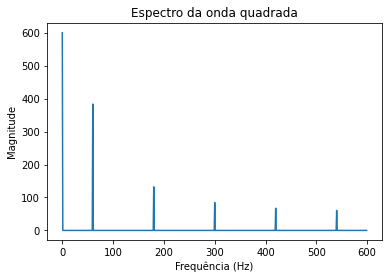

In [72]:
N=len(t)
fft_square=np.fft.fft(square)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_square)[0:int(N/2)])
plt.title('Espectro da onda quadrada')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

In [73]:
# frequencias principais do espectro da onda quadrada
np.argwhere(np.abs(fft_square[:int(N/2)])>5)

array([[  0],
       [ 60],
       [180],
       [300],
       [420],
       [540]])

Text(0, 0.5, 'Amplitude')

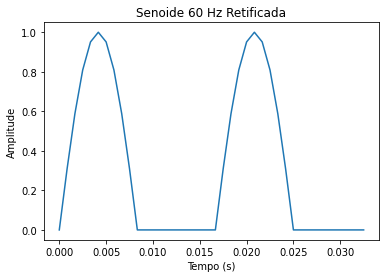

In [74]:
# Retificação de meia onda do sinal senoidal
sen_ret = square*senoide
plt.plot(t[0:2*int(fs/fm)],sen_ret[0:2*int(fs/fm)])
plt.title('Senoide 60 Hz Retificada')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Magnitude')

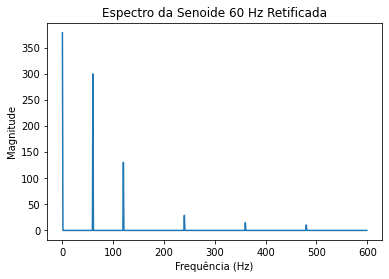

In [75]:
N=len(t)
fft_senoide_ret=np.fft.fft(sen_ret)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_senoide_ret)[0:int(N/2)])
plt.title('Espectro da Senoide 60 Hz Retificada')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

In [76]:
# frequencias principais do espectro da senoide retificada
np.argwhere(np.abs(fft_senoide_ret[:int(N/2)])>5)

array([[  0],
       [ 60],
       [120],
       [240],
       [360],
       [480]])

Text(0, 0.5, 'Amplitude')

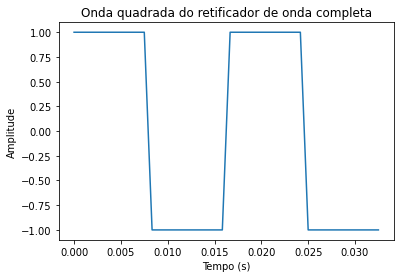

In [77]:
#Retificação de onda completa
square2_block=np.append(np.ones(int(fs/(2*fm))),-np.ones(int(fs/(2*fm))))
square2=np.tile(square2_block,int(length*fm))
plt.plot(t[0:2*int(fs/fm)],square2[0:2*int(fs/fm)])
plt.title('Onda quadrada do retificador de onda completa')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Magnitude')

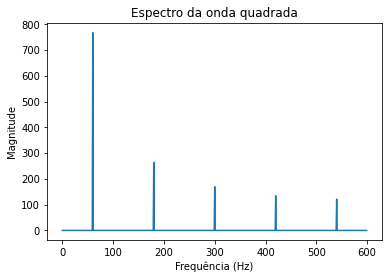

In [78]:
N=len(t)
fft_square2=np.fft.fft(square2)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_square2)[0:int(N/2)])
plt.title('Espectro da onda quadrada')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Amplitude')

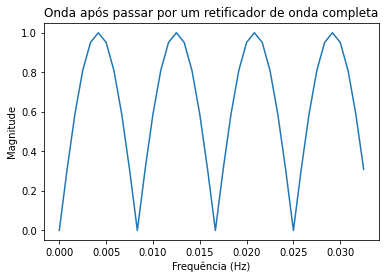

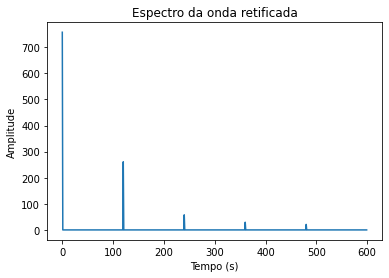

In [79]:
ret_completo=np.multiply(senoide,square2)
plt.plot(t[0:2*int(fs/fm)],ret_completo[0:2*int(fs/fm)])
plt.title('Onda após passar por um retificador de onda completa')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

plt.figure()
fft_ret_completo=np.fft.fft(ret_completo)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_ret_completo)[0:int(N/2)])
plt.title('Espectro da onda retificada')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

In [80]:
fft_ret_completo[0]

(757.6501817610056+0j)

In [81]:
# frequencias principais da onda quadrada de retificação completa
np.argwhere(np.abs(fft_square2[:int(N/2)])>5)

array([[ 60],
       [180],
       [300],
       [420],
       [540]])

In [82]:
# frequencias principais do espectro da senoide retificada por onda completa
np.argwhere(np.abs(fft_ret_completo[:int(N/2)])>5)

array([[  0],
       [120],
       [240],
       [360],
       [480]])

Text(0.5, 1.0, 'Espectro de Fourier da onda controlada')

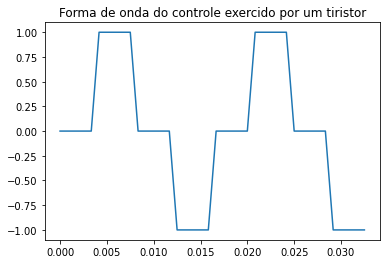

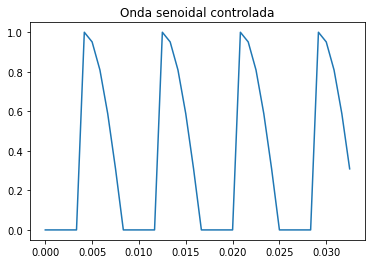

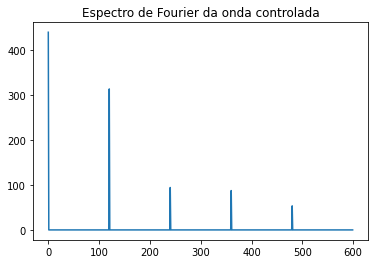

In [83]:
square_block_tir=np.append(np.zeros(int(fs/(4*fm))),np.ones(int(fs/(4*fm))))
square_block_tir=np.append(square_block_tir,-square_block_tir)
square_tir=np.tile(square_block_tir,int(length*fm))
plt.plot(t[0:2*int(fs/fm)],square_tir[0:2*int(fs/fm)])
plt.title('Forma de onda do controle exercido por um tiristor')

ret_tir=np.multiply(senoide,square_tir)
plt.figure()
plt.plot(t[0:2*int(fs/fm)],ret_tir[0:2*int(fs/fm)])
plt.title('Onda senoidal controlada')

plt.figure()
fft_ret_tir=np.fft.fft(ret_tir)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_ret_tir)[0:int(N/2)])
plt.title('Espectro de Fourier da onda controlada')

In [84]:
fft_ret_tir[0]

(438.82509088050097+0j)

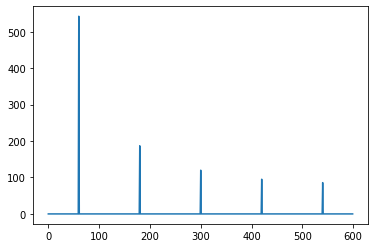

In [85]:
fft_tir=np.fft.fft(square_tir)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_tir)[0:int(N/2)])


In [86]:
# frequencias principais do espectro do tiristor
np.argwhere(np.abs(fft_tir[:int(N/2)])>5)

array([[ 60],
       [180],
       [300],
       [420],
       [540]])

Text(0, 0.5, 'Magnitude')

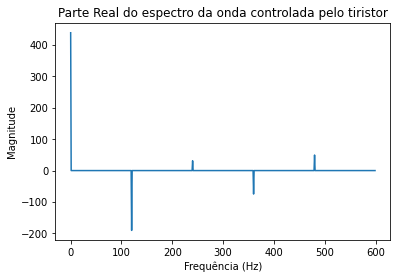

In [105]:
plt.plot(f[0:int(N/2)],np.real(fft_ret_tir)[0:int(N/2)])
plt.title('Parte Real do espectro da onda controlada pelo tiristor')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Magnitude')

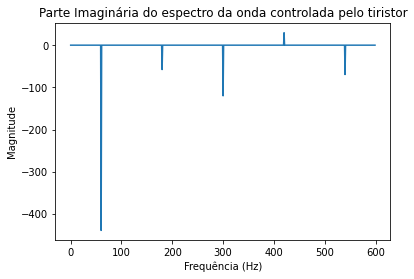

In [106]:
plt.plot(f[0:int(N/2)],np.imag(fft_tir)[0:int(N/2)])
plt.title('Parte Imaginária do espectro da onda controlada pelo tiristor')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Magnitude')

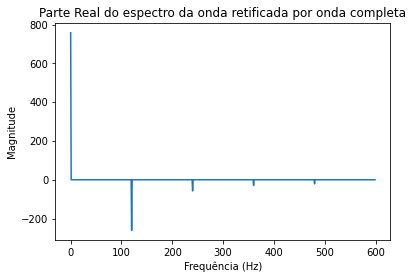

In [107]:
plt.plot(f[0:int(N/2)],np.real(fft_ret_completo)[0:int(N/2)])
plt.title('Parte Real do espectro da onda retificada por onda completa')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Magnitude')

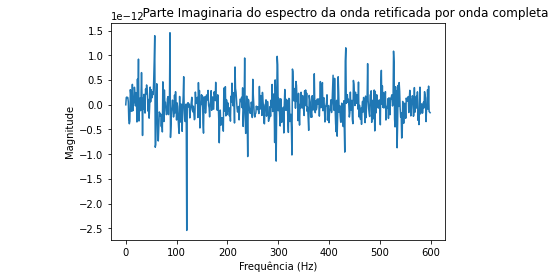

In [113]:
plt.plot(f[0:int(N/2)],np.imag(fft_ret_completo)[0:int(N/2)])
plt.title('                                   Parte Imaginaria do espectro da onda retificada por onda completa')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Fase')

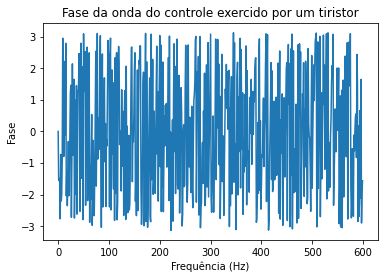

In [87]:
plt.plot(f[0:int(N/2)],np.angle(fft_ret_tir)[0:int(N/2)])
plt.title('Fase da onda do controle exercido por um tiristor')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fase")

Text(0, 0.5, 'Fase')

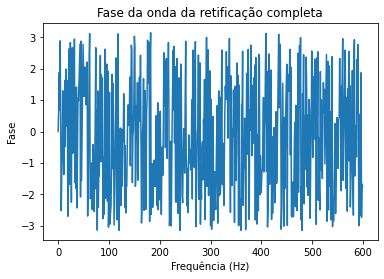

In [88]:
plt.plot(f[0:int(N/2)],np.angle(fft_ret_completo)[0:int(N/2)])
plt.title('Fase da onda da retificação completa')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fase")

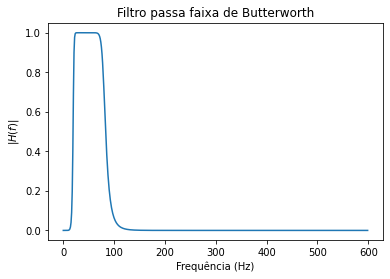

In [89]:
low = 20
high = 80
bandpass_filter = signal.butter(8, [low, high], btype='band', fs = fs, output = 'sos')

#Plota a resposta em frequência do filtro
w,h = signal.sosfreqz(bandpass_filter,fs = fs)
plt.plot(w,np.abs(h));
plt.xlabel('Frequência (Hz)')
plt.ylabel('$|H(f)|$')
plt.title('Filtro passa faixa de Butterworth');

Text(0, 0.5, 'Magnitude')

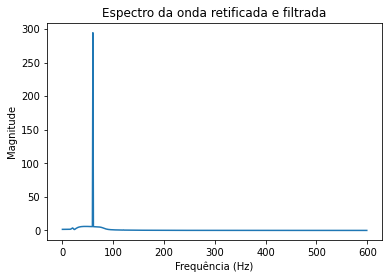

In [91]:
#Filtra o sinal usando o filtro projetado acima
sen_ret_filtrado = signal.sosfilt(bandpass_filter, sen_ret)
N=len(t)
fft_sen_ret_filtrado =np.fft.fft(sen_ret_filtrado)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_sen_ret_filtrado)[0:int(N/2)])
plt.title('Espectro da onda retificada e filtrada')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Amplitude')

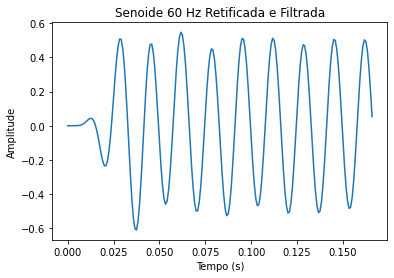

In [96]:
plt.plot(t[0:10*int(fs/fm)],sen_ret_filtrado[0:10*int(fs/fm)])
plt.title('Senoide 60 Hz Retificada e Filtrada')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")